# Exercise 1: Linear Regression

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from YourAnswer import cost_naive, cost_vectorized, gradient_descent_func_naive, gradient_descent_func_vectorized, ols_func
%matplotlib inline

## Part 1: Plotting 

We start the exercise by first plotting the data to understand the problem we are working with.

In [2]:
data = pandas.read_csv('ex1data1.txt', header=None, names=['population', 'profit'])

`data.head()` shows 5 examples of data.

In [3]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


`data.shape` returns a dimension of data. 

In [4]:
data.shape

(97, 2)

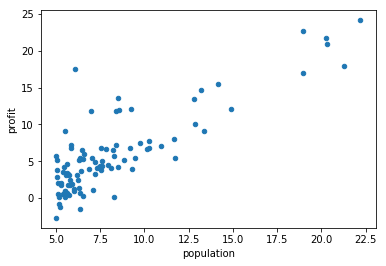

In [5]:
data.plot(x='population', y='profit', kind='scatter')

## Part 2:  Gradient descent

In this part, you will fit the linear regression parameters $\pmb\theta$ to our dataset using gradient descent.<br>
The objective of linear regression is to minimize the cost function<br><br>

<center>$J(\pmb\theta) = \frac{1}{2n}\sum\limits_{i=1}^n \:({y}^{(i)}-{h}_{\pmb\theta}{(\mathbf x}^{(i)}))^2$</center><br><br>

where the hypothesis $h_{\pmb \theta}(\mathbf{x})$ is given by the linear model<br><br>
<center>${h}_{\pmb\theta}{(\mathbf x)}=\pmb\theta^T \mathbf{ \widetilde x}=\theta_0+\theta_1x_1$</center><br><br>

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\pmb\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update<br><br>

<center>$\pmb\theta:=\pmb\theta+\alpha\frac{1}{n}\sum\limits_{i=1}^n \:({y}^{(i)}-{h}_{\pmb\theta}{(\mathbf x}^{(i)}))\widetilde{\mathbf x}^{(i)}$</center><br><br>


We build a matrix $\mathbf{X}$ that satisfies $row_i(\mathbf X) = \mathbf{\widetilde x}^{(i)}$ by inserting ones in data.

In [6]:
# Adding a column of ones to the dataset
data.insert(0, 'ones', 1.)
data.head()

,ones,population,profit
0,1.0,6.1101,17.5920
1,1.0,5.5277,9.1302
2,1.0,8.5186,13.6620
3,1.0,7.0032,11.8540
4,1.0,5.8598,6.8233


Initialize fitting parameters:

In [7]:
theta = np.zeros(2)

Gradient descent settings:

In [8]:
iterations = 1500
alpha = 0.01

Getting the pandas data as raw numpy arrays:

In [9]:
X = data[['ones', 'population']].values
Y = data['profit'].values
n = len(data)

Now, let's implement vectorized cost function. You should not use loop statements.

### To do:
- Implement `cost_naive`, `cost_vectorized` in `YourAnswer.py` file.

Cost at initial theta:<br>
You shoud expect to see a cost of 32.07 <br>
The costs of two different versions must be the same.

In [10]:
n_cost = cost_naive(X, Y, theta)
print ('cost by naive : %.2f' % n_cost)
v_cost = cost_vectorized(X, Y, theta)
print ('cost by vectorized : %.2f' % v_cost)
print ('cost difference : %f' % np.abs(n_cost - v_cost))

cost by naive : 32.07
cost by vectorized : 32.07
cost difference : 0.000000


### To do:
- Implement `gradient_descent_func_naive`, `gradient_descent_func_vectorized` in `YourAnswer.py` file.

Run gradient descent by two different versions.<br>
The results should be the same, and vectorized version should be much faster.

In [11]:
s_time = time.time()
theta_n, J_his_n, T_his_n = gradient_descent_func_naive(X, Y, theta, alpha, iterations)
print ('theta by naive : {} with {:.3f}s'.format(theta_n, time.time()-s_time))

s_time = time.time()
theta_v, J_his_v, T_his_v = gradient_descent_func_vectorized(X, Y, theta, alpha, iterations)
print ('theta by vectorized : {} with {:.3f}s'.format(theta_v, time.time()-s_time))

theta by naive : [-3.63029144  1.16636235] with 0.723s
theta by vectorized : [-3.63029144  1.16636235] with 0.017s


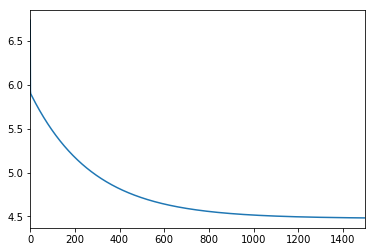

In [12]:
pandas.Series(J_his_v).plot()

Predicting profit for population size 7.5 and 15:

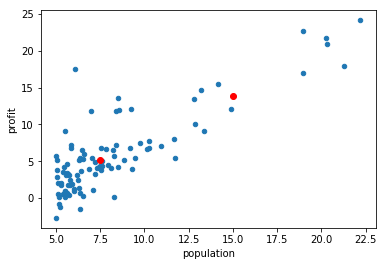

In [13]:
data.plot(x='population', y='profit', kind='scatter')
X_test = np.array([[1, 7.5], [1, 15]])
y_pred = X_test @ theta_v
plt.plot(X_test[:,1], y_pred, 'ro')

## Part 3:  Ordinary Least Squares(OLS)

Theta found by OLS:<br>
You should expect to see [-3.895, 1.193].<br>
This is a similar result to one by gradient descent method

### To do:
- Implement `ols_func` in `YourAnswer.py` file.

In [14]:
theta = ols_func(X, Y)
print(theta)

[-3.89578088  1.19303364]


## Part 4: Visualizing J(theta_0, theta_1) 

In [15]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-1, 4, 100))

In [16]:
J_vals = np.zeros(xx.shape)

In [17]:
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        J_vals[i, j] = cost_vectorized(X, Y, np.array([xx[i,j], yy[i,j]]))

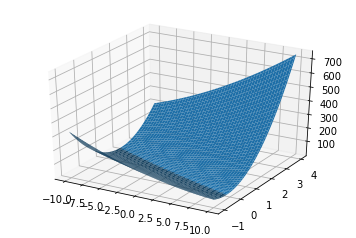

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, J_vals)

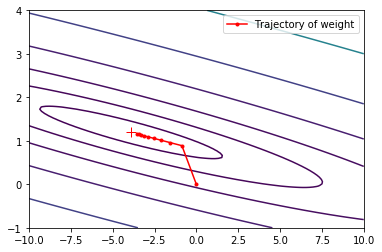

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(xx, yy, J_vals, levels=np.logspace(-2, 3, 15))
ax.plot(theta[0], theta[1], 'r+', markersize=10)
index = np.arange(10)*150
ax.plot(T_his_v[index,0], T_his_v[index,1], 'r.-', label='Trajectory of weight')
ax.legend()

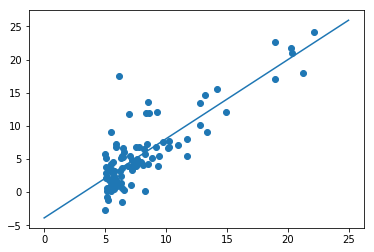

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data.population, data.profit)
Xs = np.linspace(0,25,100)
def Ys(theta):
    return theta[0] + Xs*theta[1]
ax.plot(Xs, Ys(theta))

In [21]:
T_his_v

array([[ 0.        ,  0.        ],
       [ 0.05839135,  0.6532885 ],
       [ 0.06289175,  0.77000978],
       ...,
       [-3.62885054,  1.1662176 ],
       [-3.6293317 ,  1.16626593],
       [-3.62981201,  1.16631419]])

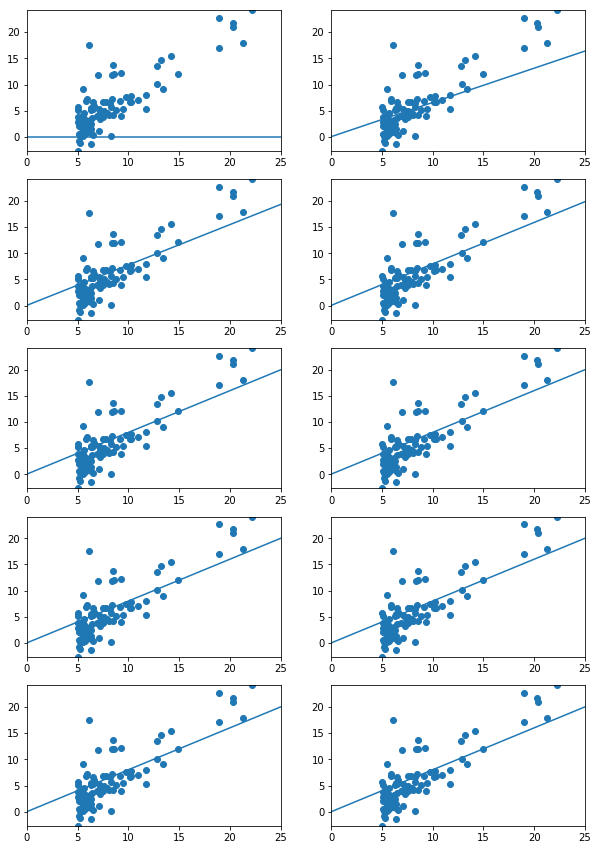

In [22]:
fig = plt.figure(figsize=(10,15))
for i, t in enumerate(T_his_v[:10]):
    ax = fig.add_subplot(5,2,i+1)
    ax.autoscale(tight=True)
    ax.scatter(data.population, data.profit)
    ax.plot(Xs, Ys(t))